<center>
<h4>Diplomatura Datos 2021 - FaMAF - UNC</h4>
<h1>Aplicando Machine Learning para predicción de demanda</h1>
<h3>Exploración y Curación</h3>
</center>
</left>
<h4>Dario Yvanoff</h4>
</left>

[Proyecto para Mentoría](https://sites.google.com/view/mentorias2021-diplodatos/aplicando-machine-learning-para-predicci%C3%B3n-de-demanda?authuser=0)

# Objetivo 

El objetivo final de la mentoría es poder predecir el próximo mes de venta de productos en los diferentes países y zonas en donde opera la compañía de retail proveedora de los datasets. Concretamente vamos a intentar predecir el proximo mes para una localidad dada. Sin embargo, los prácticos que se realizarán en esta mentoría son aplicables a compañías de cualquier vertical de negocio que quiera predecir la demanda.

¿Cuáles serían los productos mas vendidos el próximo mes en cada localidad, provincia y país?

¿Cuánto de cada producto se vendería el próximo mes en cada localidad, provincia y país?

¿Cuándo convendría comenzar la distribución de cada producto a los almacenes más cercanos del consumidor?

¿Qué productos se venderían juntos? Identificamos clusters de productos que pueden distribuirse conjuntamente antes que efectivamente se compren.

### Información Importante

En la presente notebook, se presentará la consigna a seguir para el segundo práctico correspondiente a la materia Exploración y Curación. En esta notebook se enumeran las consignas que permitirán implementar los pasos necesarios para explorar en mayor profundidad la información, proceder a la limpieza del dataset y generar un dataset resultante que servirá de input para los futuros prácticos de ML. 

Cada grupo debe armar un repositorio git o agregar al repositorio existente con el trabajo de Exploración y Curación de la mentoría. En dicho repositorio deben presentar:
- una notebook respondiendo las consignas de este práctico
- un archivo python que se pueda correr desde el sistema operativo (Ej: python nombre_archivo.py) y que ejecute la lectura de los datos, la curación del dataset aplicando los pasos del checklist, el enriquecimiento del dataset con nuevas columnas y la generación del archivo final comprimido.
- un informe (formato html, ppt o pdf) con las respuestas de este práctico. Dicho informe servirá de base para obtener la información a presentar en los videos intermedio y final de la mentoria. 

Se recomienda que el informe tenga las siguientes secciones:
- Introducción 
- Respuestas a los puntos del práctico
- Principales conclusiones

#### Nota: 
Es muy importante no solo resolver las consignas técnicamente sino tambien tener la claridad en la comunicación de los hallazgos, exponer las conclusiones y tener poder de síntesis. Se valorará que la presentación sea acompañada de los gráficos adecuados en las consignas que corresponda. Cuando se agreguen al informe, los graficos deben hablar por si mismos.




### Entregables 

Fecha de Entrega de este practico y el informe de Exploración y Curación: 4/7/2021

# Importacion de librerías

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
from string import digits
from functools import partial
import chardet

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('max_colwidth', 151)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Consigna para Informe de Exploración y Curación

## 1- Curación de datos

Este practico consistirá en aplicar el checklist de limpieza de datos que se encuentra en https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning conjuntamente con la verificación de la consistencia de la información. Cada decisión tomada en la aplicación del checklist de limpieza deberá quedar documentada claramente. 

Si se considera conveniente y de utilidad, cada grupo podrá enriquecer el conjunto de datos con información externa al mismo. Los datos a incorporar en el dataset deberán ser aquellos que se intuya puedan tener una relación con el comportamiento de compra de congelados de los consumidores tales como densidad de población por localidad, feriados nacionales o temperaturas en días previos (ejemplos no exhaustivo de features que puedan determinar el comportamiento de compra). Este proceso de enriquecimiento podrá ser iterativo y podrá continuar mientras se realicen los experimentos de machine learning en los próximos prácticos.

Como se mencionó anteriormente el dataset resultante aqui servirá de entrada a los futuros modelos de aprendizaje automático (ML). 

Se propone contestar cada uno de los puntos expuestos en esta notebook generando una rutina python de manera que puedan ser llamados desde el sistema operativo que dispongan. Dicha rutina debe contemplar desde la lectura de los dataset, pasando por cada punto del checklist de limpieza hasta la grabación del dataset resultante en un archivo pkl. 

### Checklist Data Cleaning

### 1- Importación Datos

#### 1.1. Verificación de Inexistencia de Problemas en la Importación

In [3]:
# Lectura del dataset Productos
productos = pd.read_csv('./dataset/productos.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Categorias
categorias = pd.read_csv('./dataset/categorias.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Punto de Venta
pdv = pd.read_csv('dataset/puntos_de_venta.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Ventas
ventas = pd.read_csv('dataset/ventas.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Paises, Provincias y Localidades
paises = pd.read_csv('dataset/paises.zip', delimiter=';', encoding='latin-1')
provincias = pd.read_csv('dataset/provincias.zip', delimiter=';', encoding='latin-1')
localidades = pd.read_csv('dataset/localidades.zip', delimiter=';', encoding='latin-1')

In [4]:
# Creamos el campo fecha
ventas['fecha'] = ventas['anio'].astype(str) + '-' + ventas['mes'].astype(str).str.zfill(2) + '-' + ventas['dia'].astype(str).str.zfill(2)

# Convertimos a datetime el atributo fecha
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

In [5]:
def remove_accents(df, columns=[]):
    columns = list(columns)
    if len(columns) !=0:
        for i in range(len(columns)):
            if columns[i] in df.columns:
                df[columns[i]]=df[columns[i]].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    else:
        print("Seleccione una columna o la columna no se encuentra en el DataFrame")

In [6]:
# Realizamos una copia de cada df para realizar cambios y no afectar los dataset originales
productos_copy = productos.copy()
categorias_copy = categorias.copy()
pdv_copy = pdv.copy()
ventas_copy = ventas.copy()
paises_copy = paises.copy()
provincias_copy = provincias.copy()
localidades_copy = localidades.copy()

In [7]:
productos_copy.head()

sku          descripcion     marca  id_categoria presentacion  unidadcm3  \
0  223  PACKXX-XX-X-XXXRIDO     GRIDO            58         Pack       0.64   
1  224  PACKXX-XX-X-XXXRIDO     GRIDO            57         Pack       0.77   
2  225  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack       0.59   
3  226  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack       0.70   
4  227  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack       5.00   

   unidadkg  id_proveedor  
0      3.31             2  
1      4.22             2  
2      3.31             2  
3      4.22             2  
4      5.00             2

In [8]:
# Vemos los tipos de datos
productos_copy.dtypes.to_frame()

0
sku             int64
descripcion    object
marca          object
id_categoria    int64
presentacion   object
unidadcm3     float64
unidadkg      float64
id_proveedor    int64

In [9]:
productos_copy["unidadkg"]=pd.to_numeric(productos_copy["unidadkg"])

In [10]:
productos_copy.head()

sku          descripcion     marca  id_categoria presentacion  unidadcm3  \
0  223  PACKXX-XX-X-XXXRIDO     GRIDO            58         Pack       0.64   
1  224  PACKXX-XX-X-XXXRIDO     GRIDO            57         Pack       0.77   
2  225  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack       0.59   
3  226  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack       0.70   
4  227  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack       5.00   

   unidadkg  id_proveedor  
0      3.31             2  
1      4.22             2  
2      3.31             2  
3      4.22             2  
4      5.00             2

In [11]:
print(productos_copy.shape)
productos_copy.dtypes.to_frame()

(4352, 8)


0
sku             int64
descripcion    object
marca          object
id_categoria    int64
presentacion   object
unidadcm3     float64
unidadkg      float64
id_proveedor    int64

In [12]:
print(categorias_copy.shape)
categorias_copy.head()

(88, 2)


id_categoria                          nombre
0            35      05 - Pack Impulsivos Grido
1            36           07 - Pack Potes Grido
2            37  06 - Pack Postres/Tortas Grido
3            38                 000 - GRIDO MIX
4            39                     08 - Otros.

In [13]:
# Vemos los tipos de datos
categorias_copy.dtypes.to_frame()

0
id_categoria   int64
nombre        object

In [14]:
print(pdv_copy.shape)
pdv_copy.head()

(1850, 5)


id_punto_venta           nombre  id_Provincia  id_Localidad  id_Pais
0         100001  MONXXX-XX-XXSTO             5          1890        1
1         100002  SAMXXX-XX-XXCHO             5          2018        1
2         100003  VA.XXX-XX-XXE I             5          2124        1
3       100003-1  VILXXX-XX-XXIII             5          2124        1
4         100004  SUCXXX-XX-XXCRE            18          4263        1

In [15]:
# Vemos los tipos de datos de pdv
pdv_copy.dtypes.to_frame()

0
id_punto_venta  object
nombre          object
id_Provincia     int64
id_Localidad     int64
id_Pais          int64

In [16]:
ventas_copy.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    4    1  2018  15:05:34.0000000  3071             1.00         100000   
1    4    1  2018  15:05:34.0000000  1872             4.00         100000   
2    4    1  2018  15:05:34.0000000  2008             4.00         100000   
3    4    1  2018  15:05:34.0000000  2009             4.00         100000   
4    4    1  2018  15:05:34.0000000  1918             4.00         100000   

       fecha  
0 2018-01-04  
1 2018-01-04  
2 2018-01-04  
3 2018-01-04  
4 2018-01-04

In [17]:
ventas_copy.shape

(5666365, 8)

In [18]:
# Vemos los tipos de datos
ventas_copy.dtypes.to_frame()

0
dia                       int64
mes                       int64
anio                      int64
hora                     object
sku                       int64
cantidad_pedida         float64
id_punto_venta           object
fecha            datetime64[ns]

In [19]:
#Exploración de df países
print(paises_copy.shape)
paises_copy.head()

(5, 2)


id_Pais     nombre
0        1  Argentina
1        2      Chile
2        3    Uruguay
3        5   Paraguay
4        7    Bolivia

In [20]:
# Vemos los tipos de datos
paises_copy.dtypes.to_frame()

0
id_Pais   int64
nombre   object

In [21]:
#Exploración de df provincias
print(provincias_copy.shape)
provincias_copy.head()

(78, 2)


id_Provincia               nombre
0             5              Córdoba
1            11             La Rioja
2            20             Santa Fe
3            21  Santiago del Estero
4             2            Catamarca

In [22]:
# Vemos los tipos de datos
provincias_copy.dtypes.to_frame()

0
id_Provincia   int64
nombre        object

In [23]:
#Exploración de df provincias
print(localidades_copy.shape)
localidades_copy.head()

(897, 2)


id_Localidad         nombre
0             2        Córdoba
1          1737      La Calera
2          2124  Villa Allende
3          1431    Alta Gracia
4          1599     Deán Funes

In [24]:
# Vemos los tipos de datos
localidades_copy.dtypes.to_frame()

0
id_Localidad   int64
nombre        object

**Nota:** en este punto tenemos los dataframe listos para continuar con el proceso de curación de datos

#### 1.2. Asegurar la Existencia de IDs o Claves Únicas

En esta sección se chequea que no existen datos duplicados y que las claves, si existen, son únicas.

Esto debemos hacerlo sobre las entidades de **productos** y de **pdv**. Deberíamos tener un único sku por productos y id por punto de venta.

Definimos sku como indice de productos

In [25]:
productos_copy.set_index('sku')

descripcion        marca  id_categoria presentacion  unidadcm3  \
sku                                                                             
223    PACKXX-XX-X-XXXRIDO        GRIDO            58         Pack       0.64   
224    PACKXX-XX-X-XXXRIDO        GRIDO            57         Pack       0.77   
225    PACKXX-XX-X-XXXBANA     VIA BANA            40         Pack       0.59   
226    PACKXX-XX-X-XXXBANA     VIA BANA            40         Pack       0.70   
227    PACKXX-XX-X-XXXBANA     VIA BANA            40         Pack       5.00   
...                    ...          ...           ...          ...        ...   
22628  POTEXX-XX-X-XXXN LP  SIN DEFINIR            35         Pack       0.00   
22629  CUCHXX-XX-X-XXXG LP        GRIDO            35         Pack       0.00   
22660  PAPAXX-XX-X-XXXLES"  SIN DEFINIR           112     Unidades       0.00   
22661  GRIDXX-XX-X-XXX4 UN        GRIDO            35         Pack       0.00   
22662  GRIDXX-XX-X-XXX4 UN        GRIDO            35         Pack       0.00   

       unidadkg  id_proveedor  
sku                            
223        3.31             2  
224        4.22             2  
225        3.31             2  
226        4.22             2  
227        5.00             2  
...         ...           ...  
22628      0.00             3  
22629      0.00             3  
22660      0.00             2  
22661      0.00             3  
22662      0.00             3  

[4352 rows x 7 columns]

Verificamos que no haya indices duplicados para sucurales

In [26]:
productos_copy[productos_copy.index.duplicated()]

Empty DataFrame
Columns: [sku, descripcion, marca, id_categoria, presentacion, unidadcm3, unidadkg, id_proveedor]
Index: []

Nota: Como se observa no tenemos sku duplicados en productos

Definimos id_punto_venta como indice de punto de venta

In [27]:
pdv_copy.set_index('id_punto_venta')

nombre  id_Provincia  id_Localidad  id_Pais
id_punto_venta                                                      
100001          MONXXX-XX-XXSTO             5          1890        1
100002          SAMXXX-XX-XXCHO             5          2018        1
100003          VA.XXX-XX-XXE I             5          2124        1
100003-1        VILXXX-XX-XXIII             5          2124        1
100004          SUCXXX-XX-XXCRE            18          4263        1
...                         ...           ...           ...      ...
931             O´HXXX-XX-XXS I             5             2        1
953-2           A. XXX-XX-XXZON             5             2        1
98-18           MENXXX-XX-XXA I            12          3272        1
98-4            SANXXX-XX-XX XI            17          4063        1
985-2           LOSXXX-XX-XX II             5             2        1

[1850 rows x 4 columns]

In [28]:
pdv_copy[pdv_copy.index.duplicated()]

Empty DataFrame
Columns: [id_punto_venta, nombre, id_Provincia, id_Localidad, id_Pais]
Index: []

Nota: Como se observa no tenemos id_punto_venta duplicados en punto de venta

#### 1.3. Despersonalizar Datos y Guardarlos en un Nuevo Archivo

En este caso, no es necesario despersonalizar ningún dato, dado que las columnas con información sensible ya nos han sido provistas enmascaradas.

#### 1.4. Nunca Modificar los Datos Crudos u Originales

Al finalizar la limpieza, deberán guardar el dataset resultante en un nuevo archivo, para asegurarse de no modificar los datos originales.

### 2. Pasos Importantes para limpieza de Datos

#### 2.1. Etiquetas de Variables/Columnas y Problemas de Codificación/Encoding

Verificamos el encoding de la fuente de datos. Tomamos primeros 100000 caracteres, por ejemplo:

In [29]:
with open(path + 'productos.csv',"rb") as f:
    data = f.read()
    print("encoding de productos:",chardet.detect(data))
with open(path + 'categorias.csv',"rb") as f:
    data = f.read()
    print("encoding de categorías:", chardet.detect(data))
with open(path + 'puntos_de_venta.csv',"rb") as f:
    data = f.read()
    print("encoding de pdv:", chardet.detect(data))
with open(path + 'ventas.csv',"rb") as f:
    data = f.read()
    print("encoding de ventas:", chardet.detect(data))    
with open(path + 'paises.csv',"rb") as f:
    data = f.read()
    print( "encoding de paises:", chardet.detect(data))   
with open(path + 'provincias.csv',"rb") as f:
    data = f.read()
    print( "encoding de provincias:", chardet.detect(data))    
with open(path + 'localidades.csv',"rb") as f:
    data = f.read()
    print( "encoding de localidades:", chardet.detect(data))  

encoding de productos: {'encoding': 'Windows-1252', 'confidence': 0.7295995137308687, 'language': ''}
encoding de categorías: {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
encoding de pdv: {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
encoding de ventas: {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
encoding de paises: {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
encoding de provincias: {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
encoding de localidades: {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Analizamos los nombres de columnas utilizando la siguiente expresión `df.columns.str.extract(r'^(\w+)$')`.

In [30]:
print(ventas_copy.columns.values)
print(ventas_copy.columns[~ventas_copy.columns.str.match(r'^(\w+)$')])
print(productos_copy.columns[~productos.columns.str.match(r'^(\w+)$')])
print(pdv_copy.columns[~pdv_copy.columns.str.match(r'^(\w+)$')])
print(categorias_copy.columns[~categorias.columns.str.match(r'^(\w+)$')])
print(paises_copy.columns[~paises_copy.columns.str.match(r'^(\w+)$')])
print(provincias_copy.columns[~provincias_copy.columns.str.match(r'^(\w+)$')])
print(localidades_copy.columns[~localidades_copy.columns.str.match(r'^(\w+)$')])

['dia' 'mes' 'anio' 'hora' 'sku' 'cantidad_pedida' 'id_punto_venta'
 'fecha']
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


**Nota:** Como se observa las entidades no tienen caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

#### 2.2. Tratamiento de Valores Faltantes

Identificamos cuantos valores faltantes existen por feature y cuánto representan del total. Por ejemplo, para el dataset de productos:

In [31]:
# Verificamos si tiene valores Nan en productos
productos_copy.isnull().sum().to_frame()

0
sku           0
descripcion   0
marca         0
id_categoria  0
presentacion  0
unidadcm3     0
unidadkg      0
id_proveedor  0

In [32]:
productos_copy.presentacion.value_counts()

Pack           2371
Unidades       1106
No Asignada     576
Kilogramos      148
Baldes          136
                 15
Name: presentacion, dtype: int64

In [33]:
#Obtenemos los indices de las filas que tienen registros con valores string vacíos
np.where(productos_copy.applymap(lambda x: x == ' '))

(array([ 163,  164,  175,  186,  268,  335,  389,  453,  460,  473,  475,
         553,  554, 1212, 1215], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64))

In [34]:
# Mostramos algunos ejemplos de filas que tienen presentaciones vacías desde los índices obtenidos en la celda anterior
productos_copy[productos_copy.index.isin([163,164])]

sku          descripcion        marca  id_categoria presentacion  \
163  386  MESAXX-XX-X-XXXRIOR  SIN DEFINIR            64                
164  387  SERVXX-XX-X-XXXNOX.  SIN DEFINIR            64                

     unidadcm3  unidadkg  id_proveedor  
163       5.00      5.00             3  
164       5.00      5.00             3

In [35]:
total_prod=len(productos)
print("Porcentaje de presentaciones vacias alcanza un {0:.4f}% sobre un total de {1:} productos distintos".format(15/total_prod,total_prod))

Porcentaje de presentaciones vacias alcanza un 0.0034% sobre un total de 4352 productos distintos


Como se puede observar existen presentaciones que no son nulos pero que tampoco son NaN. Tener en cuenta este hecho en el análisis y decisiones que se tomen al respecto en cada práctico.

**A responder:** analizar las demas entidades para verificar datos faltantes o situaciones similares a la de presentación de productos y documentar las decisiones tomadas. Se podrían completar los valores faltantes?

Debemos realizar este análisis para todo el dataset

***Reemplazaríamos los valores faltante con NaN, pero en principio vamos a analizarlos con el dataframe en conjunto, para poder vincular los datos faltantes de esta entidad con otras que nos brinden mayor información.***

In [36]:
productos_copy.descripcion.value_counts()

GRIDXX-XX-X-XXXTOS)    113
PACKXX-XX-X-XXXRIDO     45
PACKXX-XX-X-XXXEXPO     40
PANTXX-XX-X-XXXFANI     40
VASOXX-XX-X-XXXnid.     36
                      ... 
CROCXX-XX-X-XXX3/09      1
CREMXX-XX-X-XXXRADO      1
HELAXX-XX-X-XXXILLA      1
CREMXX-XX-X-XXX1 KG      1
TELGXX-XX-X-XXXAM30      1
Name: descripcion, Length: 1559, dtype: int64

In [37]:
productos_copy[productos_copy['descripcion']==' ']

Empty DataFrame
Columns: [sku, descripcion, marca, id_categoria, presentacion, unidadcm3, unidadkg, id_proveedor]
Index: []

No hay valores vacíos para descripción, ni para el resto de las variables del set de datos de productos

In [38]:
productos_copy.marca.value_counts()

SIN DEFINIR    2804
GRIDO          1158
VIA BANA        328
FRIZZIO          62
Name: marca, dtype: int64

In [39]:
# Verificamos valores NaN en el dataset 'categorias'
categorias_copy.isnull().sum().to_frame()

0
id_categoria  0
nombre        0

In [40]:
# En este primer análisis visualizamos la lista de categorías y su respectiva cantidad
categorias_copy.nombre.value_counts()

VACIO                                           5
12 - MUEBLES                                    2
0003 - ALMACEN                                  1
11 - EQUIPOS                                    1
06 - PRODUCTOS DE LIMPIEZA                      1
                                               ..
02 - SUNDAE GO                                  1
0004 - CUCURUCHOS , CONOS Y VASOS DE  PASTA     1
003 - Sabores Especiales X 12 Lts - Via Bana    1
11 - IMPULSIVOS                                 1
01 - Combos de Ajuste                           1
Name: nombre, Length: 83, dtype: int64

In [41]:
# Visualizamos las categorías únicas, 
categorias_copy.nombre.unique()

array(['05 - Pack Impulsivos Grido', '07 - Pack Potes Grido',
       '06 - Pack Postres/Tortas Grido', '000 - GRIDO MIX', '08 - Otros.',
       '005 - Pack Impulsivos Via Bana', '007 - Pack Potes Via Bana',
       '006 - Pack Postres/Tortas Via Bana', '06 - SABORES AL AGUA',
       '07 - SABORES COMUNES', '08 - SABORES ESPECIALES',
       '09 - SABORES PREMIUM',
       '001 - Sabores Al Agua X 12 Lts - Via Bana',
       '002 - Sabores Comunes X 12 Lts - Via Bana',
       '003 - Sabores Especiales X 12 Lts - Via Bana',
       '004 - Sabores Premium X 12 Lts - Via Bana',
       '01 - Combos de Ajuste', '02 - Mix 70 GRANEL/30 IMP',
       '03 - Mix 60 GRANEL/40 IMP', '04 - Mix 50 GRANEL/50 IMP',
       '05 - Mix 40 GRANEL/60 IMP',
       '10 - PALITOS CREMA / FRUTAL / BOMBON', '11 - IMPULSIVOS',
       '12 - IMPULSIVOS', '13 - IMPULSIVOS', '14 - SEMI-FRIOS',
       '15 - TORTAS Y POSTRES', '16 - FAMILIAR', '17 - POTE 1 LTS',
       'Grupo genérico inserción',
       '0004 - CUCURUCHOS , C

#Identificamos que hay una serie de categorías que no corresponden al análisis de productos comestibles

In [42]:
categorias_copy[categorias_copy['nombre']==' ']

Empty DataFrame
Columns: [id_categoria, nombre]
Index: []

In [43]:
categorias_copy[categorias_copy['id_categoria']==' ']

Empty DataFrame
Columns: [id_categoria, nombre]
Index: []

#No hay registros vacios en el df "categorias"

In [44]:
# Visualizamos las columnas del df 'pdv'
pdv_copy.head()

id_punto_venta           nombre  id_Provincia  id_Localidad  id_Pais
0         100001  MONXXX-XX-XXSTO             5          1890        1
1         100002  SAMXXX-XX-XXCHO             5          2018        1
2         100003  VA.XXX-XX-XXE I             5          2124        1
3       100003-1  VILXXX-XX-XXIII             5          2124        1
4         100004  SUCXXX-XX-XXCRE            18          4263        1

In [45]:
# Verificamos existencia de valores nulos
pdv_copy.isnull().sum().to_frame()

0
id_punto_venta  0
nombre          0
id_Provincia    0
id_Localidad    0
id_Pais         0

In [46]:
# Verificamos existencia de valores vacíos en la columna 'id_punto_venta'
pdv_copy[pdv_copy['id_punto_venta']==' ']

Empty DataFrame
Columns: [id_punto_venta, nombre, id_Provincia, id_Localidad, id_Pais]
Index: []

In [47]:
pdv_copy[pdv_copy['nombre']==' ']

Empty DataFrame
Columns: [id_punto_venta, nombre, id_Provincia, id_Localidad, id_Pais]
Index: []

In [48]:
pdv_copy[pdv_copy['id_Provincia']==' ']

Empty DataFrame
Columns: [id_punto_venta, nombre, id_Provincia, id_Localidad, id_Pais]
Index: []

In [49]:
pdv_copy[pdv_copy['id_Localidad']==' ']

Empty DataFrame
Columns: [id_punto_venta, nombre, id_Provincia, id_Localidad, id_Pais]
Index: []

In [50]:
pdv_copy[pdv_copy['id_Pais']==' ']

Empty DataFrame
Columns: [id_punto_venta, nombre, id_Provincia, id_Localidad, id_Pais]
Index: []

In [51]:
##Analizamos dataset "ventas"
ventas_copy.isnull().sum().to_frame()

0
dia              0
mes              0
anio             0
hora             0
sku              0
cantidad_pedida  0
id_punto_venta   0
fecha            0

In [52]:
ventas_copy[ventas_copy['sku']==' ']

Empty DataFrame
Columns: [dia, mes, anio, hora, sku, cantidad_pedida, id_punto_venta, fecha]
Index: []

In [53]:
ventas_copy[ventas_copy['cantidad_pedida']==' ']

Empty DataFrame
Columns: [dia, mes, anio, hora, sku, cantidad_pedida, id_punto_venta, fecha]
Index: []

In [54]:
ventas_copy[ventas_copy['fecha']==' ']

Empty DataFrame
Columns: [dia, mes, anio, hora, sku, cantidad_pedida, id_punto_venta, fecha]
Index: []

In [55]:
ventas_copy[ventas_copy['id_punto_venta']==' ']

Empty DataFrame
Columns: [dia, mes, anio, hora, sku, cantidad_pedida, id_punto_venta, fecha]
Index: []

#No hay registros vacios en el dataset ventas

In [56]:
##Analizamos dataset paises
paises_copy.isnull().sum().to_frame()

0
id_Pais  0
nombre   0

In [57]:
paises_copy[paises_copy['nombre']==' ']

Empty DataFrame
Columns: [id_Pais, nombre]
Index: []

In [58]:
paises_copy[paises_copy['id_Pais']==' ']

Empty DataFrame
Columns: [id_Pais, nombre]
Index: []

#No hay valores nulos ni registros vacíos en el Dataset "paises"

In [59]:
##Analizamos dataset provincias
provincias_copy.isnull().sum().to_frame()

0
id_Provincia  0
nombre        0

In [60]:
provincias_copy[provincias_copy['nombre']==' ']

Empty DataFrame
Columns: [id_Provincia, nombre]
Index: []

In [61]:
provincias_copy[provincias_copy['id_Provincia']==' ']

Empty DataFrame
Columns: [id_Provincia, nombre]
Index: []

#No hay valores nulos ni registros vacíos en el Dataset "provincias"

In [62]:
##Analizamos dataset localidades
localidades_copy.isnull().sum().to_frame()

0
id_Localidad  0
nombre        0

In [63]:
localidades_copy[localidades_copy['nombre']==' ']

Empty DataFrame
Columns: [id_Localidad, nombre]
Index: []

In [64]:
localidades_copy[localidades_copy['id_Localidad']==' ']

Empty DataFrame
Columns: [id_Localidad, nombre]
Index: []

#No hay valores nulos ni registros vacíos en el Dataset "localidades"

#### 2.3. Codificación de Variables Categóricas

**Responder:** Aplica codificar variables categóricas?

*Para desarrollar los algoritmos de ML es necesario convertir los valores de las variables categóricas a binario.* 

#### 2.4. No Cambiar los Nombres de las Variables de la Fuente de Origen

#### 2.5. Verificación de Consistencia de Datos

Aplicar las reglas de integridad correspondientes y documentar las decisiones tomadas.

*Eliminar registros con valores negativos de variables numéricas.*

In [65]:
# En la columna 'cantidad_pedida' correspondiente al df 'ventas_copy' se detectaron 3 valores negativos
print(len(ventas_copy[ventas_copy['cantidad_pedida']<0]))

# Como se trata de unidades de productos no deberíamos incluir valores negativos en el análisis
ventas_copy[ventas_copy['cantidad_pedida']<0]

3


dia  mes  anio              hora   sku  cantidad_pedida  \
1037825    4    3  2019  19:57:46.0000000  1690           -23.00   
3463133   16   12  2018  15:28:18.0000000   772            -1.00   
5154209   26   12  2018  17:53:15.0000000  1989            -5.00   

        id_punto_venta      fecha  
1037825         100263 2019-03-04  
3463133         100978 2018-12-16  
5154209         100983 2018-12-26

In [66]:
#Eliminacion de cantidad pedida nula o  negativa
ventas_copy = ventas_copy.drop(ventas_copy[ventas_copy['cantidad_pedida']<0].index)

*Eliminar registros de variables categóricas que no corresponden a productos comestibles, ya que estan fuera de este análisis.*

In [67]:
len(categorias_copy)

88

#### 2.6. Identificar y Documentar Valores Atípicos/Outliers

Calcular estadísticos y eliminar los outliers utilizando el metodo que considere pertinentes (z-score, z-score modificado o IRQ) justificando y documentando la elección realizada. Realizar el análisis sobre la columna cantidad_pedida


In [68]:
ventas_copy.cantidad_pedida.mean()

4.492282173288611

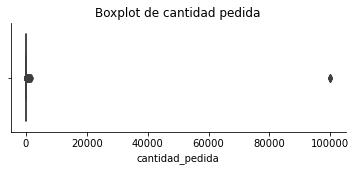

In [69]:
plt.figure(figsize=(6,2))
sns.boxplot(x=ventas_copy["cantidad_pedida"]).set(title="Boxplot de cantidad pedida")
sns.despine()
plt.show()

In [70]:
Q_1 = ventas_copy['cantidad_pedida'].quantile(0.25)
Q_3 = ventas_copy['cantidad_pedida'].quantile(0.75)

IQR_b = Q_3 - Q_1                    
BI_Calculadob = (Q_1 - 1.5* IQR_b)
BS_Calculadob = (Q_3 + 1.5* IQR_b)                

ubic_outliersb = (ventas_copy['cantidad_pedida'] < BI_Calculadob) | (ventas_copy['cantidad_pedida'] > BS_Calculadob)
outliersb = ventas_copy[ubic_outliersb]

ubic_sin_outliersb = (ventas_copy['cantidad_pedida'] >= BI_Calculadob) & (ventas_copy['cantidad_pedida'] <= BS_Calculadob)
ventas_copy_cantmay0 = ventas_copy[ubic_sin_outliersb]

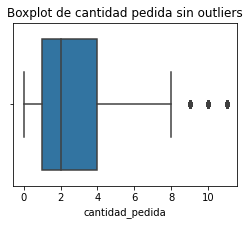

In [71]:
plt.figure(figsize=(4,3))
sns.boxplot(x=ventas_copy_cantmay0["cantidad_pedida"]).set(title="Boxplot de cantidad pedida sin outliers")
plt.show()

#### 2.7. Evaluar Cómo Comprimir los Datos Para su Almacenamiento Más Eficiente

In [72]:
# Se podría comprimir en .zip, .gzip, .pkl

#### 2.8. Guardar el Set de Datos con un Nombre Informativo

Combinar las fuentes de datos curadas en un unico archivo. Para ello, antes deberá hacer merge de todos los dataframe para lograr un único dataset final resultante. Se recomienda guardar el dataset resultante en formato comprimido. 

In [73]:
# Unimos productos y categorias tomando la variable en comun id_categoría 
productos_categoria=pd.merge(productos_copy,categorias_copy,on='id_categoria').rename(columns={'nombre':'categoria'})

In [74]:
productos_categoria.head()

sku          descripcion        marca  id_categoria presentacion  \
0   223  PACKXX-XX-X-XXXRIDO        GRIDO            58         Pack   
1  1021  PACKXX-XX-X-XXX X 8  SIN DEFINIR            58     Unidades   
2   224  PACKXX-XX-X-XXXRIDO        GRIDO            57         Pack   
3   332  PACKXX-XX-X-XXXRIDO        GRIDO            57   Kilogramos   
4   333  PACKXX-XX-X-XXXRIDO        GRIDO            57   Kilogramos   

   unidadcm3  unidadkg  id_proveedor        categoria  
0       0.64      3.31             2  12 - IMPULSIVOS  
1       0.64      3.22             2  12 - IMPULSIVOS  
2       0.77      4.22             2  11 - IMPULSIVOS  
3       0.77      3.60             2  11 - IMPULSIVOS  
4       0.77      4.03             2  11 - IMPULSIVOS

In [75]:
productos_copy.shape

(4352, 8)

In [76]:
productos_categoria.shape

(4352, 9)

In [77]:
cant_productos = len(productos_copy.id_categoria.unique())
cant_categoria = len(categorias_copy.id_categoria.unique())
print('Quedan excluidos del merge productos_categorias {} Id_categorias'.format(cant_categoria-cant_productos))

Quedan excluidos del merge productos_categorias 12 Id_categorias


In [78]:
array_productos = productos_copy.id_categoria.unique()
array_productos

array([ 58,  57,  40,  36,  62,  41,  61,  60,  42,  38,  39,  43,  44,
        45,  46,  47,  48,  49,  50,  56,  59,  63,  51,  52,  53,  54,
        55,  85,  92,  64,  81,  79,  94,  72,  78,  73,  69,  88,  71,
        66,  68,  70,  74,  65,  77, 554,  95,  96,  97, 100,  98, 546,
       112, 111, 117, 118, 154, 250,  35, 365, 544, 557, 556, 558, 242,
       278, 449, 382, 555, 383, 453, 545, 549, 620, 770, 721], dtype=int64)

In [79]:
array_categorias = categorias_copy.id_categoria.unique()
array_categorias

array([ 35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  83,  84,  85,  86,  88,
        92,  94,  95,  96,  97,  98, 100, 110, 111, 112, 116, 117, 118,
       154, 189, 242, 250, 278, 365, 382, 383, 449, 453, 544, 545, 546,
       548, 549, 554, 555, 556, 557, 558, 620, 721, 770], dtype=int64)

In [80]:
productos_categoria.isna().sum().to_frame()

0
sku           0
descripcion   0
marca         0
id_categoria  0
presentacion  0
unidadcm3     0
unidadkg      0
id_proveedor  0
categoria     0

In [81]:
#Listamos las categorías que no corresponden  a productos comestibles y las sacamos del df que
#nos interesa analizar
productos_totales = ['Grupo genérico inserción','vacia','VACIO','nuevo','09 - DISPENSER',
'10 - CARTELERIA, INSTITUCIONALES Y PLOTEOS','07 - ACCESORIOS, UTENSILIOS Y REPUESTOS ',
'08 - INDUMENTARIA ','06 - PRODUCTOS DE LIMPIEZA ','11 - EQUIPOS','12 - MUEBLES',
'20 - SISTEMAS DE FRÍO A PEDIDO ','0001 - GRIDO MARKET','0005 - CARTELERIA, INSTITUCIONALES Y PLOTEOS',
'0001 - INDUMENTARIA ','0006 - EQUIPOS','0008 - MUEBLES','12 - REPUESTOS EQUIPOS DE FRIO',
'0007 - ACCESORIOS Y REPUESTOS PARA EQUIPOS DE FRIO','0012 - MATERIAL MKT','000 - ARTICULOS PROTECCION COVID-19','0006 - PRODUCTOS COMPOSTABLES /BIODEGRADABLES',
'00556 - PRODUCTOS BIODEGRADABLES / COMPOSTABLES','0003 - ARTICULOS PROTECCION COVID-19',
'0000 - PRODUCTOS DE LIMPIEZA ','0002 - ACCESORIOS, UTENSILIOS Y REPUESTOS ',
'0004 - DISPENSER','0002 - PRODUCTOS ESCOLARES','0003 - LIQUIDO PRODUCTO SP','0003 - ALMACEN - COMESTIBLES',
'0003 - ALMACEN', '0005 - ENVASES TERMICOS Y VASOS','0009 - DESCARTABLES ','0010 - PACKAGING']
categorias2 = productos_categoria[~productos_categoria['categoria'].isin(productos_totales)]
categorias2.head()

sku          descripcion        marca  id_categoria presentacion  \
0   223  PACKXX-XX-X-XXXRIDO        GRIDO            58         Pack   
1  1021  PACKXX-XX-X-XXX X 8  SIN DEFINIR            58     Unidades   
2   224  PACKXX-XX-X-XXXRIDO        GRIDO            57         Pack   
3   332  PACKXX-XX-X-XXXRIDO        GRIDO            57   Kilogramos   
4   333  PACKXX-XX-X-XXXRIDO        GRIDO            57   Kilogramos   

   unidadcm3  unidadkg  id_proveedor        categoria  
0       0.64      3.31             2  12 - IMPULSIVOS  
1       0.64      3.22             2  12 - IMPULSIVOS  
2       0.77      4.22             2  11 - IMPULSIVOS  
3       0.77      3.60             2  11 - IMPULSIVOS  
4       0.77      4.03             2  11 - IMPULSIVOS

In [82]:
#chequeampos que solo queden las cat comestibles
categorias2.categoria.unique()

array(['12 - IMPULSIVOS', '11 - IMPULSIVOS',
       '005 - Pack Impulsivos Via Bana', '07 - Pack Potes Grido',
       '16 - FAMILIAR', '007 - Pack Potes Via Bana',
       '15 - TORTAS Y POSTRES', '14 - SEMI-FRIOS',
       '006 - Pack Postres/Tortas Via Bana', '000 - GRIDO MIX',
       '08 - Otros.', '06 - SABORES AL AGUA', '07 - SABORES COMUNES',
       '08 - SABORES ESPECIALES', '09 - SABORES PREMIUM',
       '001 - Sabores Al Agua X 12 Lts - Via Bana',
       '002 - Sabores Comunes X 12 Lts - Via Bana',
       '003 - Sabores Especiales X 12 Lts - Via Bana',
       '004 - Sabores Premium X 12 Lts - Via Bana',
       '10 - PALITOS CREMA / FRUTAL / BOMBON', '13 - IMPULSIVOS',
       '17 - POTE 1 LTS', '01 - Combos de Ajuste',
       '02 - Mix 70 GRANEL/30 IMP', '03 - Mix 60 GRANEL/40 IMP',
       '04 - Mix 50 GRANEL/50 IMP', '05 - Mix 40 GRANEL/60 IMP',
       '0013 - PRODUCTOS VIA BANA - TIPO A',
       '0010 - PRODUCTOS PROMOCIONALES', '0008 - DECORACION y FRUTOS',
       '0007 - BAÑO

In [83]:
len(categorias2)

3006

In [84]:
# Unimos ventas con producto_categoria utilizando la columna sku con left join
ventas_producto = pd.merge(ventas_copy,categorias2,on='sku')

In [85]:
ventas_producto.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    4    1  2018  15:05:34.0000000  3071             1.00         100000   
1    4    1  2018  15:22:03.0000000  3071             2.00         100042   
2    4    1  2018  15:03:38.0000000  3071             1.00         100105   
3    4    1  2018  15:11:54.0000000  3071             1.00         100166   
4    4    1  2018  15:05:10.0000000  3071             3.00       100557-1   

       fecha          descripcion  marca  id_categoria presentacion  \
0 2018-01-04  GRIDXX-XX-X-XXXTOS)  GRIDO            38     Unidades   
1 2018-01-04  GRIDXX-XX-X-XXXTOS)  GRIDO            38     Unidades   
2 2018-01-04  GRIDXX-XX-X-XXXTOS)  GRIDO            38     Unidades   
3 2018-01-04  GRIDXX-XX-X-XXXTOS)  GRIDO            38     Unidades   
4 2018-01-04  GRIDXX-XX-X-XXXTOS)  GRIDO            38     Unidades   

   unidadcm3  unidadkg  id_proveedor        categoria  
0       1.76    680.32             2  000 - GRIDO MIX  
1       1.76    680.32             2  000 - GRIDO MIX  
2       1.76    680.32             2  000 - GRIDO MIX  
3       1.76    680.32             2  000 - GRIDO MIX  
4       1.76    680.32             2  000 - GRIDO MIX

In [86]:
ventas_copy.shape

(5666362, 8)

In [87]:
ventas_producto.shape

(4941079, 16)

In [88]:
ventas_producto[ventas_producto['presentacion']==' ']
#presentacion_vacia.categoria.unique()

dia  mes  anio              hora   sku  cantidad_pedida  \
4566717    1    1  2018  20:56:40.0000000  1503             1.00   
4566718    1    1  2018  21:12:37.0000000  1503             2.00   
4566719    1    1  2018  21:22:39.0000000  1503             1.00   
4566720    1    1  2018  23:21:55.0000000  1503             2.00   
4566721   14    1  2018  15:31:53.0000000  1503             3.00   
...      ...  ...   ...               ...   ...              ...   
4602016   25   12  2018  22:12:48.0000000  1500             2.00   
4602017   26   12  2018  06:47:07.0000000  1500             3.00   
4602018   27   12  2018  14:40:48.0000000  1500             4.00   
4602019   27   12  2018  15:14:05.0000000  1500             1.00   
4602020   27   12  2018  22:15:14.0000000  1500             2.00   

        id_punto_venta      fecha          descripcion     marca  \
4566717       100239-1 2018-01-01  DULCXX-XX-X-XXXBANA  VIA BANA   
4566718       100239-2 2018-01-01  DULCXX-XX-X-XXXBANA  VIA BANA   
4566719       100239-3 2018-01-01  DULCXX-XX-X-XXXBANA  VIA BANA   
4566720       100280-1 2018-01-01  DULCXX-XX-X-XXXBANA  VIA BANA   
4566721         100218 2018-01-14  DULCXX-XX-X-XXXBANA  VIA BANA   
...                ...        ...                  ...       ...   
4602016         100877 2018-12-25  NARAXX-XX-X-XXXBANA  VIA BANA   
4602017         100824 2018-12-26  NARAXX-XX-X-XXXBANA  VIA BANA   
4602018         100869 2018-12-27  NARAXX-XX-X-XXXBANA  VIA BANA   
4602019         100940 2018-12-27  NARAXX-XX-X-XXXBANA  VIA BANA   
4602020       100918-1 2018-12-27  NARAXX-XX-X-XXXBANA  VIA BANA   

         id_categoria presentacion  unidadcm3  unidadkg  id_proveedor  \
4566717            50                    0.80      6.00             2   
4566718            50                    0.80      6.00             2   
4566719            50                    0.80      6.00             2   
4566720            50                    0.80      6.00             2   
4566721            50                    0.80      6.00             2   
...               ...          ...        ...       ...           ...   
4602016            47                    0.01      7.00             2   
4602017            47                    0.01      7.00             2   
4602018            47                    0.01      7.00             2   
4602019            47                    0.01      7.00             2   
4602020            47                    0.01      7.00             2   

                                         categoria  
4566717  004 - Sabores Premium X 12 Lts - Via Bana  
4566718  004 - Sabores Premium X 12 Lts - Via Bana  
4566719  004 - Sabores Premium X 12 Lts - Via Bana  
4566720  004 - Sabores Premium X 12 Lts - Via Bana  
4566721  004 - Sabores Premium X 12 Lts - Via Bana  
...                                            ...  
4602016  001 - Sabores Al Agua X 12 Lts - Via Bana  
4602017  001 - Sabores Al Agua X 12 Lts - Via Bana  
4602018  001 - Sabores Al Agua X 12 Lts - Via Bana  
4602019  001 - Sabores Al Agua X 12 Lts - Via Bana  
4602020  001 - Sabores Al Agua X 12 Lts - Via Bana  

[1880 rows x 16 columns]

Como resultado de la unión de los df ventas_copy y categorias utilizando la columna 'sku' quedaron registros vacios en la variable presentación. Como vimos que todos estos valores correspondían a las categorías '004 - Sabores Premium X 12 Lts - Via Bana' y '001 - Sabores Al Agua X 12 Lts - Via Bana' resolvimos imputar la presentación con el valor "Balde"

In [89]:
ventas_producto.presentacion.replace(" ","Baldes", inplace= True)


In [90]:
ventas_producto[ventas_producto['presentacion']==' ']

Empty DataFrame
Columns: [dia, mes, anio, hora, sku, cantidad_pedida, id_punto_venta, fecha, descripcion, marca, id_categoria, presentacion, unidadcm3, unidadkg, id_proveedor, categoria]
Index: []

In [91]:
ventas_producto.isna().sum().to_frame()

0
dia              0
mes              0
anio             0
hora             0
sku              0
cantidad_pedida  0
id_punto_venta   0
fecha            0
descripcion      0
marca            0
id_categoria     0
presentacion     0
unidadcm3        0
unidadkg         0
id_proveedor     0
categoria        0

In [92]:
ventas_producto[(ventas_producto['presentacion']=="Baldes") & (ventas_producto['categoria']=="004 - Sabores Premium X 12 Lts - Via Bana")].head()

dia  mes  anio              hora  sku  cantidad_pedida  \
4563597    1    1  2018  20:56:40.0000000  314             2.00   
4563598    1    1  2018  21:12:37.0000000  314             2.00   
4563599    1    1  2018  21:22:39.0000000  314             3.00   
4563600    1    1  2018  23:21:55.0000000  314             2.00   
4563601   14    1  2018  15:31:53.0000000  314             1.00   

        id_punto_venta      fecha          descripcion     marca  \
4563597       100239-1 2018-01-01  CHOCXX-XX-X-XXXBANA  VIA BANA   
4563598       100239-2 2018-01-01  CHOCXX-XX-X-XXXBANA  VIA BANA   
4563599       100239-3 2018-01-01  CHOCXX-XX-X-XXXBANA  VIA BANA   
4563600       100280-1 2018-01-01  CHOCXX-XX-X-XXXBANA  VIA BANA   
4563601         100218 2018-01-14  CHOCXX-XX-X-XXXBANA  VIA BANA   

         id_categoria presentacion  unidadcm3  unidadkg  id_proveedor  \
4563597            50       Baldes       0.01      6.00             2   
4563598            50       Baldes       0.01      6.00             2   
4563599            50       Baldes       0.01      6.00             2   
4563600            50       Baldes       0.01      6.00             2   
4563601            50       Baldes       0.01      6.00             2   

                                         categoria  
4563597  004 - Sabores Premium X 12 Lts - Via Bana  
4563598  004 - Sabores Premium X 12 Lts - Via Bana  
4563599  004 - Sabores Premium X 12 Lts - Via Bana  
4563600  004 - Sabores Premium X 12 Lts - Via Bana  
4563601  004 - Sabores Premium X 12 Lts - Via Bana

In [93]:
print(len(ventas_copy.sku.unique()))
print(len(ventas_producto.sku.unique()))

588
317


In [94]:
cant_sku_vtas = len(ventas_copy.sku.unique())
cant_sku_vtas_productos = len(ventas_producto.sku.unique())
print('Quedan excluidos del merge ventas_producto {} Sku'.format(cant_sku_vtas-cant_sku_vtas_productos))
print('Lo que representa un {} % del total de SKU que corresponden a productos no comestibles producidos por la empresa' .format(((cant_sku_vtas-cant_sku_vtas_productos)/cant_sku_vtas)*100))

Quedan excluidos del merge ventas_producto 271 Sku
Lo que representa un 46.08843537414966 % del total de SKU que corresponden a productos no comestibles producidos por la empresa


Deberíamos extraer estos 'sku' que no presentan información en la df 'productos' ya que no se podría considerar
 cuantos kg se piden en estos registros

In [95]:
# Unimos pdv_ubicacion con localidades 
pdv_ubicacion=pdv.merge(localidades_copy,on='id_Localidad').rename(columns={'nombre_x':'Punto_Venta','nombre_y':'Localidad'})

In [96]:
localidades_copy.shape

(897, 2)

In [97]:
pdv_ubicacion.shape

(1850, 6)

In [98]:
n_localidades=len(localidades_copy.id_Localidad.unique())
n_localidades_ubicacion=len(pdv_ubicacion.id_Localidad.unique())

print('Quedan excluidos del merge productos_categorias {} Id_localidades'.format(n_localidades-n_localidades_ubicacion))

Quedan excluidos del merge productos_categorias 164 Id_localidades


In [99]:
# Unimos pdv_ubicacion con provincias
pdv_ubicacion=pdv_ubicacion.merge(provincias_copy,on='id_Provincia').rename(columns={'nombre':'Provincia'})

In [100]:
provincias_copy.shape

(78, 2)

In [101]:
pdv_ubicacion.shape

(1850, 7)

In [102]:
len(provincias_copy.id_Provincia.unique())

78

In [103]:
len(pdv_ubicacion.id_Provincia.unique())

25

In [104]:
pdv_ubicacion.isna().sum().to_frame()

0
id_punto_venta  0
Punto_Venta     0
id_Provincia    0
id_Localidad    0
id_Pais         0
Localidad       0
Provincia       0

In [105]:
# Unimos pdv_ubicacion con paises
pdv_ubicacion=pdv_ubicacion.merge(paises_copy,on='id_Pais').rename(columns={'nombre':'Pais'})

In [106]:
paises_copy.shape

(5, 2)

In [107]:
pdv_ubicacion.shape

(1850, 8)

In [108]:
len(paises_copy.id_Pais.unique())

5

In [109]:
paises_copy.head()

id_Pais     nombre
0        1  Argentina
1        2      Chile
2        3    Uruguay
3        5   Paraguay
4        7    Bolivia

In [110]:
#identificamos solo 2 paises
len(pdv_ubicacion.id_Pais.unique())

2

In [111]:
#identificamos Argentina y Uruguay
pdv_ubicacion.Pais.unique()

array(['Argentina', 'Uruguay'], dtype=object)

In [112]:
pdv_ubicacion.isna().sum().to_frame()

0
id_punto_venta  0
Punto_Venta     0
id_Provincia    0
id_Localidad    0
id_Pais         0
Localidad       0
Provincia       0
Pais            0

In [113]:
ventas_producto_pdv = pd.merge(ventas_producto,pdv_ubicacion,on='id_punto_venta',how='inner')

In [114]:
ventas_producto_pdv.head(1)

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    4    1  2018  15:22:03.0000000  3071             2.00         100042   

       fecha          descripcion  marca  id_categoria presentacion  \
0 2018-01-04  GRIDXX-XX-X-XXXTOS)  GRIDO            38     Unidades   

   unidadcm3  unidadkg  id_proveedor        categoria      Punto_Venta  \
0       1.76    680.32             2  000 - GRIDO MIX  TREXXX-XX-XX II   

   id_Provincia  id_Localidad  id_Pais Localidad Provincia       Pais  
0             4          1413        1    Trelew    Chubut  Argentina

In [115]:
#Eliminamos columnas id_Pais y Pais porque solo tenemos datos de Argentina.
ventas_producto_pdv.drop(columns=['id_Pais', 'Pais'], inplace=True)

In [116]:
ventas_producto.shape

(4941079, 16)

In [117]:
ventas_producto_pdv.shape

(4353431, 21)

In [118]:
#identificamos los Nan resultantes del merge
ventas_producto_pdv.isna().sum().to_frame()

0
dia              0
mes              0
anio             0
hora             0
sku              0
cantidad_pedida  0
id_punto_venta   0
fecha            0
descripcion      0
marca            0
id_categoria     0
presentacion     0
unidadcm3        0
unidadkg         0
id_proveedor     0
categoria        0
Punto_Venta      0
id_Provincia     0
id_Localidad     0
Localidad        0
Provincia        0

In [119]:
#eliminamos los países, provincias y localidades que presentan valores Nan (perdimos 589231 valores)
ventas_producto_pdv.dropna(inplace=True)
ventas_producto_pdv.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    4    1  2018  15:22:03.0000000  3071             2.00         100042   
1    4    1  2018  15:22:03.0000000  1872            12.00         100042   
2   11    1  2018  15:12:27.0000000  1872            24.00         100042   
3   18    1  2018  15:12:37.0000000  1872            24.00         100042   
4   25    1  2018  15:19:50.0000000  1872            24.00         100042   

       fecha          descripcion    marca  id_categoria presentacion  \
0 2018-01-04  GRIDXX-XX-X-XXXTOS)    GRIDO            38     Unidades   
1 2018-01-04  PACKXX-XX-X-XXXGRS.  FRIZZIO           112         Pack   
2 2018-01-11  PACKXX-XX-X-XXXGRS.  FRIZZIO           112         Pack   
3 2018-01-18  PACKXX-XX-X-XXXGRS.  FRIZZIO           112         Pack   
4 2018-01-25  PACKXX-XX-X-XXXGRS.  FRIZZIO           112         Pack   

   unidadcm3  unidadkg  id_proveedor        categoria      Punto_Venta  \
0       1.76    680.32             2  000 - GRIDO MIX  TREXXX-XX-XX II   
1       1.19      6.12             2     01 - FRIZZIO  TREXXX-XX-XX II   
2       1.19      6.12             2     01 - FRIZZIO  TREXXX-XX-XX II   
3       1.19      6.12             2     01 - FRIZZIO  TREXXX-XX-XX II   
4       1.19      6.12             2     01 - FRIZZIO  TREXXX-XX-XX II   

   id_Provincia  id_Localidad Localidad Provincia  
0             4          1413    Trelew    Chubut  
1             4          1413    Trelew    Chubut  
2             4          1413    Trelew    Chubut  
3             4          1413    Trelew    Chubut  
4             4          1413    Trelew    Chubut

In [120]:
print(ventas_producto_pdv.shape)
ventas_producto_pdv.isna().sum().to_frame()

(4353431, 21)


0
dia              0
mes              0
anio             0
hora             0
sku              0
cantidad_pedida  0
id_punto_venta   0
fecha            0
descripcion      0
marca            0
id_categoria     0
presentacion     0
unidadcm3        0
unidadkg         0
id_proveedor     0
categoria        0
Punto_Venta      0
id_Provincia     0
id_Localidad     0
Localidad        0
Provincia        0

### 3. Pasos Opcionales para limpieza de Datos - Deseables

#### 3.1. Ordenar Variables/Columnas

In [121]:
#Reordenamos columnas
ventas_producto_pdv= ventas_producto_pdv.reindex(columns=['dia', 'mes', 'anio', 'hora', 'fecha',
    'cantidad_pedida','unidadkg','unidadcm3','sku', 'categoria', 'id_categoria','descripcion',
    'presentacion','marca' ,'id_proveedor','id_punto_venta', 'Punto_Venta', 'id_Localidad',
    'Localidad', 'id_Provincia','Provincia'])

#### 3.2. Quitar Variables/Columnas Irrelevantes

Analizando la matriz de correlación de la variables independientes, existen variables irrelevantes o que podriamos quitar?

#### 3.3. Renombrar Variables de Grillas

Esto se puede hacer de manera transparente a través de un diccionario.

In [122]:
# estandarizar el formato de los nombres de las columnas (minúsculas)
ventas_producto_pdv.rename(columns={'Punto_Venta':'punto_venta',
                        'id_Localidad':'id_localidad',
                         'Localidad':'localidad',
                         'id_Provincia':'id_provincia',
                         'Provincia':'provincia'},inplace=True)
ventas_producto_pdv.columns

Index(['dia', 'mes', 'anio', 'hora', 'fecha', 'cantidad_pedida', 'unidadkg',
       'unidadcm3', 'sku', 'categoria', 'id_categoria', 'descripcion',
       'presentacion', 'marca', 'id_proveedor', 'id_punto_venta',
       'punto_venta', 'id_localidad', 'localidad', 'id_provincia',
       'provincia'],
      dtype='object')

#### 3.4. Categorizar Variables que Contengan “Otros”

Se sugiere reemplazar los valores de las columnas categóricas que contienen valores vacíos por el string "Otros" para el caso de marcas, presentaciones y categorias. 

Los registros con valores vacíos de la variable presentación fueron imputados con "Baldes"

#### 3.5. Agregar Metadata a los Datos

Agregar información acerca de cuando y como fueron obtenidos, limpieza realizada, decisiones implementadas, etc.

In [123]:
# Los datos fueron provisto por el negocio desde sus sistemas con informacion historica

### 4- Análisis complementario de algunas features

En este punto deberán realizar un análisis mas profundo de algunas features y documentar las decisiones tomadas. 

Algunas preguntas que deberán responder en este apartado son:

#### 4.1 Al generarse los joins entre todas las fuentes de datos qué información quedó excluída?

Contestada luego de finalizado cada merge-

#### 4.2 Luego de aplicar el checklist de limpieza tiene features resultantes de tipo object? que decisión tomarán al respecto?

In [124]:
# los features de tipo object serán transformados en 0 y 1 para poder ingresarlo al Modelo de ML.
ventas_producto_pdv.dtypes.to_frame()

0
dia                       int64
mes                       int64
anio                      int64
hora                     object
fecha            datetime64[ns]
cantidad_pedida         float64
unidadkg                float64
unidadcm3               float64
sku                       int64
categoria                object
id_categoria              int64
descripcion              object
presentacion             object
marca                    object
id_proveedor              int64
id_punto_venta           object
punto_venta              object
id_localidad              int64
localidad                object
id_provincia              int64
provincia                object

#### 4.3 Que decisión se tomó con respecto a los puntos de venta que no tienen información de localización tales como paises, provincias y localidades?

Eliminamos los Nans de países, provincias y localidades porque al no poder identificar individualmente ni deducirlos de otras columnas, no podemos desconocer el lugar donde se produce la demanda de productos y por lo tanto quedaría fuera del análisis.

#### 4.4 Que decisión se tomó con aquellas filas cuya cantidad_pedida era menor o igual a 0?

Respondido antes en la notebook y luego de nuevo en el informe.

#### 4.5 El dataset tiene la feature presentacion en NaN o string vacío?. En caso afirmativo, que decisión condieran pertinente tomar al respecto?

Como resultado de la unión de los df ventas_copy y categorias utilizando la columna 'sku' quedaron registros vacios en la variable presentación. Como vimos que todos estos valores correspondían a las categorías '004 - Sabores Premium X 12 Lts - Via Bana' y '001 - Sabores Al Agua X 12 Lts - Via Bana' resolvimos imputar la presentación con el valor "Balde"

#### 4.6 El dataset tiene la feature marca en NaN o con string vacíos?. En caso afirmativo, que decisión condieran pertinente tomar al respecto?

In [125]:
ventas_producto_pdv["marca"].unique()

array(['GRIDO', 'FRIZZIO', 'SIN DEFINIR', 'VIA BANA'], dtype=object)

No tenía strings vacíos sino que estaban bajo la categoría SIN DEFINIR. No tomamos acción.

#### 4.7 Tomaron alguna decisión adicional que redujo la cantidad de filas en el dataset resultante?

#Eliminamos las filas que tenian 'cantidad_pedida' < 0, las ubicaciones que no tenían valores ingresados y eliminamos aquellos registros correspondientes a categorías de productos no congelados.

#### 4.8 Análisis adicional 

Cualquier análisis adicional o feature que deseen agregar porque lo consideran pertinente, será bienvenido y valorado.

#periodos vacacionales en ciudades turísticas/movimiento poblacional. Feriados.
#densidad poblacional.
#temperaturas máximas mensuales-

### 5- Enriquecimiento dataset sumando nuevas features

En caso que los datos de estas columnas tengan números, acentos, signos y/o estén en mayúsuclas crear nuevas columnas para cada una de ellas con sufijo _depurada. El contenido de estas nuevas columnas deben estar en minúsculas, quitar acentos, quitar números y quitar signos de puntuación si corresponde. 

In [126]:
ventas_producto_pdv["presentacion_depurada"]=ventas_producto_pdv.presentacion.str.lower()

ventas_producto_pdv["categoria_depurada"]=ventas_producto_pdv.categoria.str.lower()
sincero=ventas_producto_pdv.categoria_depurada.str.split(" - ")

lst2 = [item[1] for item in sincero]
ventas_producto_pdv["categoria_depurada"]=lst2
ventas_producto_pdv["marca_depurada"]=ventas_producto_pdv.marca.str.lower()

#ventas_producto_pdv.sample(1)

In [127]:
ventas_producto_pdv['aniomes'] = ventas_producto_pdv['fecha'].apply(lambda x: x.strftime('%Y-%m')) 
ventas_producto_pdv.head()

dia  mes  anio              hora      fecha  cantidad_pedida  unidadkg  \
0    4    1  2018  15:22:03.0000000 2018-01-04             2.00    680.32   
1    4    1  2018  15:22:03.0000000 2018-01-04            12.00      6.12   
2   11    1  2018  15:12:27.0000000 2018-01-11            24.00      6.12   
3   18    1  2018  15:12:37.0000000 2018-01-18            24.00      6.12   
4   25    1  2018  15:19:50.0000000 2018-01-25            24.00      6.12   

   unidadcm3   sku        categoria  id_categoria          descripcion  \
0       1.76  3071  000 - GRIDO MIX            38  GRIDXX-XX-X-XXXTOS)   
1       1.19  1872     01 - FRIZZIO           112  PACKXX-XX-X-XXXGRS.   
2       1.19  1872     01 - FRIZZIO           112  PACKXX-XX-X-XXXGRS.   
3       1.19  1872     01 - FRIZZIO           112  PACKXX-XX-X-XXXGRS.   
4       1.19  1872     01 - FRIZZIO           112  PACKXX-XX-X-XXXGRS.   

  presentacion    marca  id_proveedor id_punto_venta      punto_venta  \
0     Unidades    GRIDO             2         100042  TREXXX-XX-XX II   
1         Pack  FRIZZIO             2         100042  TREXXX-XX-XX II   
2         Pack  FRIZZIO             2         100042  TREXXX-XX-XX II   
3         Pack  FRIZZIO             2         100042  TREXXX-XX-XX II   
4         Pack  FRIZZIO             2         100042  TREXXX-XX-XX II   

   id_localidad localidad  id_provincia provincia presentacion_depurada  \
0          1413    Trelew             4    Chubut              unidades   
1          1413    Trelew             4    Chubut                  pack   
2          1413    Trelew             4    Chubut                  pack   
3          1413    Trelew             4    Chubut                  pack   
4          1413    Trelew             4    Chubut                  pack   

  categoria_depurada marca_depurada  aniomes  
0          grido mix          grido  2018-01  
1            frizzio        frizzio  2018-01  
2            frizzio        frizzio  2018-01  
3            frizzio        frizzio  2018-01  
4            frizzio        frizzio  2018-01

In [128]:
ventas_producto_pdv.shape

(4353431, 25)

In [129]:
#Creacion de feature "locprov"
ventas_producto_pdv['locprov']=ventas_producto_pdv['provincia'] + ventas_producto_pdv['localidad'].str.pad(width=2,fillchar='0')

In [130]:
ventas_producto_pdv.shape

(4353431, 26)

### 5.1 Tratamiento de las features presentación, categoria y marca

#### 5.2 One Hot Encoding

#### 5.2.1: Creación variables dummies

Generar variables dummies para aquellas features de tipo objects que considere pueden aportar a los futuros modelos de machine learning.  Las features que seleccione aqui pueden no ser las definitivas pues pueden ser consideradas mas adelante nuevas features en el proceso circular de un proyecto de machine learning . Puede utilizar pandas.get_dummies o sklearn.preprocessing.OneHotEncoder para este propósito. Algunos ejemplos de columnas candidatas a ser columnas dummies son marca, categoria, presentación, provincias-localidad y sku. 

**Nota:** la generación de dummies para provincia-localidad y sku generará una gran cantidade columnas. A fines de reducir la cantidad de columnas para estas dos features generar solo dummies de las top N mas frecuentes. Adicionar una nueva variable que sea otras_localidades y otros_sku para indicar aquellas ventas que no se realizan en las localidades o con los sku mas frecuentes o no estan en el top N antes mencionado. Seleccione el parámetro N que considere representativo.

In [131]:
locprov_count = ventas_producto_pdv.locprov.value_counts(ascending=False)\
    .reset_index()\
    .rename(columns={'index': "locprov","locprov": 'frecuencia_locprov'})
locprov_count['frec_relativa']= (locprov_count['frecuencia_locprov']/len(ventas_producto_pdv.locprov))*100
locprov_count.describe()

frecuencia_locprov  frec_relativa
count              657.00         657.00
mean              6626.23           0.15
std              25460.72           0.58
min                  4.00           0.00
25%               2158.00           0.05
50%               3721.00           0.09
75%               5633.00           0.13
max             617664.00          14.19

In [132]:
#seleccionamos las locprov con frecuencia relativa mayor 0.2
locprov_frec=locprov_count[locprov_count['frec_relativa']>0.20]

In [133]:
len(locprov_frec)

92

In [134]:
ventas_producto_pdv.loc[~ventas_producto_pdv['locprov'].isin(locprov_frec['locprov']),'locprov'] = 'otras_localidades'
ventas_producto_pdv.head()

dia  mes  anio              hora      fecha  cantidad_pedida  unidadkg  \
0    4    1  2018  15:22:03.0000000 2018-01-04             2.00    680.32   
1    4    1  2018  15:22:03.0000000 2018-01-04            12.00      6.12   
2   11    1  2018  15:12:27.0000000 2018-01-11            24.00      6.12   
3   18    1  2018  15:12:37.0000000 2018-01-18            24.00      6.12   
4   25    1  2018  15:19:50.0000000 2018-01-25            24.00      6.12   

   unidadcm3   sku        categoria  id_categoria          descripcion  \
0       1.76  3071  000 - GRIDO MIX            38  GRIDXX-XX-X-XXXTOS)   
1       1.19  1872     01 - FRIZZIO           112  PACKXX-XX-X-XXXGRS.   
2       1.19  1872     01 - FRIZZIO           112  PACKXX-XX-X-XXXGRS.   
3       1.19  1872     01 - FRIZZIO           112  PACKXX-XX-X-XXXGRS.   
4       1.19  1872     01 - FRIZZIO           112  PACKXX-XX-X-XXXGRS.   

  presentacion    marca  id_proveedor id_punto_venta      punto_venta  \
0     Unidades    GRIDO             2         100042  TREXXX-XX-XX II   
1         Pack  FRIZZIO             2         100042  TREXXX-XX-XX II   
2         Pack  FRIZZIO             2         100042  TREXXX-XX-XX II   
3         Pack  FRIZZIO             2         100042  TREXXX-XX-XX II   
4         Pack  FRIZZIO             2         100042  TREXXX-XX-XX II   

   id_localidad localidad  id_provincia provincia presentacion_depurada  \
0          1413    Trelew             4    Chubut              unidades   
1          1413    Trelew             4    Chubut                  pack   
2          1413    Trelew             4    Chubut                  pack   
3          1413    Trelew             4    Chubut                  pack   
4          1413    Trelew             4    Chubut                  pack   

  categoria_depurada marca_depurada  aniomes            locprov  
0          grido mix          grido  2018-01  otras_localidades  
1            frizzio        frizzio  2018-01  otras_localidades  
2            frizzio        frizzio  2018-01  otras_localidades  
3            frizzio        frizzio  2018-01  otras_localidades  
4            frizzio        frizzio  2018-01  otras_localidades

In [135]:
#sku mas frecuentes
sku_count = ventas_producto_pdv.sku.value_counts(ascending=False)\
    .reset_index()\
    .rename(columns={'index': 'sku', 'sku': 'frecuencia'})
sku_count['frec_relativa']= (sku_count['frecuencia']/(sku_count['frecuencia'].sum()))*100
sku_count.describe()

sku  frecuencia  frec_relativa
count   316.00      316.00         316.00
mean   2945.60    13776.68           0.32
std    3085.31    21952.50           0.50
min     223.00        1.00           0.00
25%     910.75      212.00           0.00
50%    1715.50     1426.50           0.03
75%    3168.25    15046.25           0.35
max   12102.00    74524.00           1.71

In [136]:
sku_frec=sku_count[sku_count['frec_relativa']>1.25]
len(sku_frec)

33

In [139]:
ventas_producto_pdv.loc[~ventas_producto_pdv['sku'].isin(sku_frec['sku']),'sku'] = 'otros_sku'
ventas_producto_pdv.sample(1)

dia  mes  anio              hora      fecha  cantidad_pedida  \
100666    6    3  2018  15:39:35.0000000 2018-03-06             1.00   

        unidadkg  unidadcm3        sku             categoria  id_categoria  \
100666      7.80       0.80  otros_sku  09 - SABORES PREMIUM            46   

                descripcion presentacion  marca  id_proveedor id_punto_venta  \
100666  CREMXX-XX-X-XXXRIDO     Unidades  GRIDO             2         100031   

            punto_venta  id_localidad localidad  id_provincia provincia  \
100666  CARXXX-XX-XXFFA             2   Córdoba             5   Córdoba   

       presentacion_depurada categoria_depurada marca_depurada  aniomes  \
100666              unidades    sabores premium          grido  2018-03   

               locprov  
100666  CórdobaCórdoba

In [140]:
ventas_producto_pdv.shape

(4353431, 26)

In [195]:
# FILTRADO DE PROV CBA
ventas_producto_pdv_cba=ventas_producto_pdv[ventas_producto_pdv['provincia']=='Córdoba']
# FILTRADO DE LOC CBA
ventas_producto_pdv_cba=ventas_producto_pdv[ventas_producto_pdv['localidad']=='Córdoba']

In [196]:
aux=ventas_producto_pdv_cba.groupby(['aniomes','locprov','sku'],as_index=False).agg({"cantidad_pedida":sum,"unidadkg":sum}).sort_values('aniomes', ascending=True)

In [197]:
aux.head()

aniomes         locprov   sku  cantidad_pedida  unidadkg
0   2018-01  CórdobaCórdoba   223          2596.00   1771.92
19  2018-01  CórdobaCórdoba  1688           862.00   3705.00
20  2018-01  CórdobaCórdoba  1689          1524.00   4399.20
21  2018-01  CórdobaCórdoba  1690           834.00   3556.80
22  2018-01  CórdobaCórdoba  1691           487.00   2870.40

In [198]:
aux=aux.reset_index()

In [199]:
aux.dtypes

index                int64
aniomes             object
locprov             object
sku                 object
cantidad_pedida    float64
unidadkg           float64
dtype: object

In [200]:
aux[(aux.locprov=='CórdobaCórdoba') & (aux.sku==223)].loc[:, aux.columns.isin(["aniomes",'cantidad_pedida', 'media'])]

aniomes  cantidad_pedida
0    2018-01          2596.00
60   2018-02          2255.00
93   2018-03          2427.00
120  2018-04          2021.00
156  2018-05          1709.00
188  2018-06          1256.00
222  2018-07          1598.00
258  2018-08          1911.00
291  2018-09          2669.00
324  2018-10          3191.00
360  2018-11          2511.00
392  2018-12          3148.00
426  2019-01          2809.00
462  2019-02          3703.00
502  2019-03          1757.00
528  2019-04          1912.00
564  2019-05          1691.00
596  2019-06          1425.00
630  2019-07          1685.00
666  2019-08          1701.00
698  2019-09          1987.00
733  2019-10          2425.00
767  2019-11          2774.00
801  2019-12          3541.00

#### 5.3 Valores cantidad_pedida para los periodos t-n (Lag)

Crear columnas nuevas que representen los valores de cantidad_pedida para la combinación de provincia-localidad y sku agrupados por mes para n periodos anteriores (lag t-n). Podrá utilizar pandas.Series.shift para lograr este requerimiento. Seleccione el n que considere pertinente y justifique su elección. 

In [201]:
def rolling_df(pdf, pwindow, column , group_col):
    df=pdf.copy()
    
    #Calculo de media movil simple con transform
    df['MA_{}'.format(pwindow)]  = df.groupby(group_col,as_index=False)[column].transform(lambda x: x.rolling(pwindow).mean())

    return df

In [202]:
df_timeseries2 = rolling_df(aux, 2, "cantidad_pedida",["locprov","sku"])
df_timeseries2.head()

index  aniomes         locprov   sku  cantidad_pedida  unidadkg  MA_2
0      0  2018-01  CórdobaCórdoba   223          2596.00   1771.92   NaN
1     19  2018-01  CórdobaCórdoba  1688           862.00   3705.00   NaN
2     20  2018-01  CórdobaCórdoba  1689          1524.00   4399.20   NaN
3     21  2018-01  CórdobaCórdoba  1690           834.00   3556.80   NaN
4     22  2018-01  CórdobaCórdoba  1691           487.00   2870.40   NaN

In [203]:
df_timeseries2[(df_timeseries2.locprov=='CórdobaCórdoba') & (df_timeseries2.sku==223)].loc[:, df_timeseries2.columns.isin(["aniomes",'sku','locprov','cantidad_pedida', 'MA_2'])]

aniomes         locprov  sku  cantidad_pedida    MA_2
0    2018-01  CórdobaCórdoba  223          2596.00     NaN
60   2018-02  CórdobaCórdoba  223          2255.00 2425.50
93   2018-03  CórdobaCórdoba  223          2427.00 2341.00
120  2018-04  CórdobaCórdoba  223          2021.00 2224.00
156  2018-05  CórdobaCórdoba  223          1709.00 1865.00
188  2018-06  CórdobaCórdoba  223          1256.00 1482.50
222  2018-07  CórdobaCórdoba  223          1598.00 1427.00
258  2018-08  CórdobaCórdoba  223          1911.00 1754.50
291  2018-09  CórdobaCórdoba  223          2669.00 2290.00
324  2018-10  CórdobaCórdoba  223          3191.00 2930.00
360  2018-11  CórdobaCórdoba  223          2511.00 2851.00
392  2018-12  CórdobaCórdoba  223          3148.00 2829.50
426  2019-01  CórdobaCórdoba  223          2809.00 2978.50
462  2019-02  CórdobaCórdoba  223          3703.00 3256.00
502  2019-03  CórdobaCórdoba  223          1757.00 2730.00
528  2019-04  CórdobaCórdoba  223          1912.00 1834.50
564  2019-05  CórdobaCórdoba  223          1691.00 1801.50
596  2019-06  CórdobaCórdoba  223          1425.00 1558.00
630  2019-07  CórdobaCórdoba  223          1685.00 1555.00
666  2019-08  CórdobaCórdoba  223          1701.00 1693.00
698  2019-09  CórdobaCórdoba  223          1987.00 1844.00
733  2019-10  CórdobaCórdoba  223          2425.00 2206.00
767  2019-11  CórdobaCórdoba  223          2774.00 2599.50
801  2019-12  CórdobaCórdoba  223          3541.00 3157.50

In [204]:
def shift_df(df, tminus, shifted_column, groupCol, dropna):
    for i in range(1, tminus+1):
        df['t-{}'.format(i)] = df.groupby(groupCol,as_index=False)[shifted_column].shift(i)
        
    if dropna:
        df = df.dropna()
        df = df.reset_index(drop=True)
    return df

In [205]:
# Aplicamos la función Shift al df
df_timeseries = shift_df(df_timeseries2, 1, "cantidad_pedida",["locprov","sku"],dropna=True)
df_timeseries.head()

index  aniomes         locprov   sku  cantidad_pedida  unidadkg    MA_2  \
0     53  2018-02  CórdobaCórdoba  1688           767.00   3104.40  814.50   
1     58  2018-02  CórdobaCórdoba  1693           880.00   3338.40  925.50   
2     54  2018-02  CórdobaCórdoba  1689          1263.00   3658.20 1393.50   
3     55  2018-02  CórdobaCórdoba  1690           743.00   3034.20  788.50   
4     56  2018-02  CórdobaCórdoba  1691           436.00   2457.00  461.50   

      t-1  
0  862.00  
1  971.00  
2 1524.00  
3  834.00  
4  487.00

In [206]:
#Chequeamos que se haya hecho bien el shift
df_timeseries[(df_timeseries.locprov=='otras_localidades') & (df_timeseries.sku==223)].head(10)

Empty DataFrame
Columns: [index, aniomes, locprov, sku, cantidad_pedida, unidadkg, MA_2, t-1]
Index: []

In [207]:
#Agregamos la columna totalkg
df_timeseries['totalkg']=(df_timeseries.cantidad_pedida)*(df_timeseries.unidadkg)
df_timeseries.head()

index  aniomes         locprov   sku  cantidad_pedida  unidadkg    MA_2  \
0     53  2018-02  CórdobaCórdoba  1688           767.00   3104.40  814.50   
1     58  2018-02  CórdobaCórdoba  1693           880.00   3338.40  925.50   
2     54  2018-02  CórdobaCórdoba  1689          1263.00   3658.20 1393.50   
3     55  2018-02  CórdobaCórdoba  1690           743.00   3034.20  788.50   
4     56  2018-02  CórdobaCórdoba  1691           436.00   2457.00  461.50   

      t-1    totalkg  
0  862.00 2381074.80  
1  971.00 2937792.00  
2 1524.00 4620306.60  
3  834.00 2254410.60  
4  487.00 1071252.00

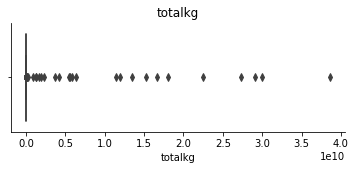

In [208]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df_timeseries["totalkg"]).set(title="totalkg")
sns.despine()
plt.show()

In [209]:
q_1 = df_timeseries['totalkg'].quantile(0.25)
q_3 = df_timeseries['totalkg'].quantile(0.75)

IQR_k = q_3 - q_1                    
BI_Calculadok = (q_1 - 1.5* IQR_k)
BS_Calculadok = (q_3 + 1.5* IQR_k)             

ubic_outliersk = (df_timeseries['totalkg'] < BI_Calculadok) | (df_timeseries['totalkg'] > BS_Calculadok)
outliersk = df_timeseries[ubic_outliersk]

ubic_sin_outliersk = (df_timeseries['totalkg'] >= BI_Calculadok) & (df_timeseries['totalkg'] <= BS_Calculadok)
df_timeseries = df_timeseries[ubic_sin_outliersk]

In [210]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df_timeseries["totalkg"]).set(title="totalkg")
sns.despine()
plt.show()

In [216]:
ventas_producto_pdv_final=pd.get_dummies(df_timeseries, columns= ["aniomes","sku"])

In [217]:
ventas_producto_pdv_final.drop(columns=['index','unidadkg'], inplace=True)

In [218]:
# ventas_producto_pdv_final.to_pickle("./congelados.pkl")

In [214]:
ventas_producto_pdv_final.shape

(728, 61)

In [222]:
ventas_producto_pdv_final.drop('locprov',axis=1,inplace=True)

In [223]:
ventas_producto_pdv_final.to_csv("./congelados_cba.csv")

#### 5.4 Crear columnas nuevas para medias móviles simples y/o ponderadas

Crear medias móviles simples y/o ponderadas de la columna cantidad_pedida de n periodos pasados para la combinación de provincia-localidad y sku agrupados por mes. Considere utilizar pandas rolling para el calculo de medias móviles. Seleccione "window" que considere pertinente y justifique su elección.

#### 5.5 Features externas a agregar

Que features externas consideran pueden enriquecer el dataset pues tendrían relación con el comportamiento de compra?. Será bienvenido y valorado enriquecer el dataset con alguna variable adicional que considere pertinente y este diponible en forma pública. 

In [189]:
#Temperaturas máximas por día de las localidades
#densidad poblacional

#### 5.6 Crear columna totalkg

En el dataset se puede observar que hay distintos tipos de presentaciones (baldes, pack, etc) y que los productos tienen especificado su peso en kilogramos en la variable unidadkg para cada producto/presentacion. Por tanto, para poder tener una unidad de medida uniforme para todos los productos a producir por la fábrica se sugiere crear una nueva columna en el dataset denominada totalkg que sea el resultado de la multiplicación de cantidad_pedida x unidadkg. Repetir el analisis de outliers esta vez sobre la columna totalkg. Se encontraron nuevos outliers?
